## Model for housing price prediction

In [185]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Data loading and exploration

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Text(0.5, 0, 'SalePrice')

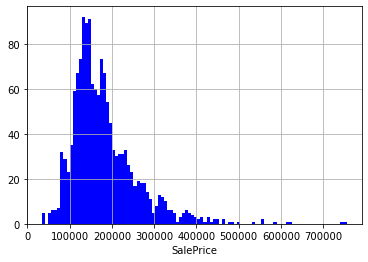

In [87]:
# load data
data_train = pd.read_csv("data/train.csv")

# view data
print(data_train['SalePrice'].describe())

# plot data
plt.hist(data_train['SalePrice'], 100, facecolor='b')
plt.grid(True)
plt.xlabel("SalePrice")

The most values are between 100000 and 250000 but there are some extremely
expensive outliers.<br><br>
### Definition of the model and its evaluation
We will use simple multivariate linear regression model and its
usual evaluation metrics RMSE and R^2. RMSE will be a measure of
how accurately our model predicts the response
and R^2 will account for the
percent of the data explained, indicating the goodness of the fit
of the model. These two metrics were chosen as our primary
interest is in improving model prediction accuracy.


### Research to find the most correlated variables

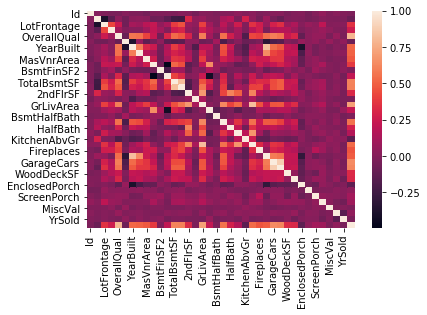

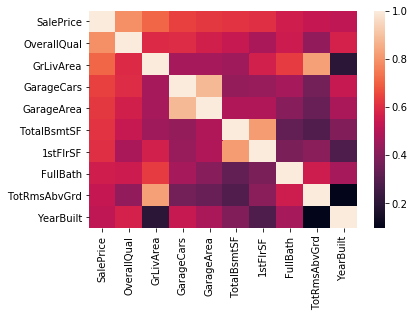

In [88]:
# correlation matrix for all variables
corr_matrix = data_train.corr()
sn.heatmap(corr_matrix)
plt.show()

# correlation matrix for the 10 most correlated ones
cols = corr_matrix.nlargest(10, 'SalePrice')['SalePrice'].index
sn.heatmap(data_train[cols].corr())

We have found that these 10 variables are the most correlated with
SalePrice so we will use them in our model.
### Data transformation, model training and evaluation

In [144]:
# select needed columns for model training
variables = data_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                        'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']]

target = data_train["SalePrice"]

# split chosen data into training and evaluation one
x_train, x_test, y_train, y_test = train_test_split(variables, target
                                                    , test_size = 0.4, random_state=9)

# train model
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(x_train, y_train)

# evaluate model performance
test = lin_reg_mod.predict(x_test)

test_set_rmse = (math.sqrt(mean_squared_error(y_test, test)))
test_set_r2 = r2_score(y_test, test)

print(test_set_rmse)
print(test_set_r2)


35807.383808461454
0.8067682963737318


As we can see based on R^2, we have quite high fit to the data (80%) which is pretty
 good result. In the meantime our RMSE is quite high also, meaning that on average
 our model predicted values will differ from the actual ones about 36000$ which is pretty
 mediocre result.


### Model prediction and results saving

In [186]:
# select needed columns
x_pred = pd.read_csv("data/test.csv")[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                                       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']]

# replace NaN entries with 0 so that model works
x_pred = x_pred.fillna(0)

# run model prediction
pred = lin_reg_mod.predict(x_pred)

# join predicted SalePrice and Id
result = pd.DataFrame(pred, columns=["SalePrice"])
ids = pd.DataFrame(pd.read_csv("data/test.csv")["Id"])
result = ids.join(result)

# save into file
with open("prediction.csv", "w") as f:
    f.write(result.to_csv(index=False).replace("\n", ""))
    f.close()

We run our model on test data and saved predicted results to prediction.csv.
